In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/yamini542/AppliedAI_Assignments/main/Assessment_4/Data/train.csv')
# load the training data from train.csv file


In [4]:
df.shape

(668, 10)

In [5]:
df.head(5)

,id,A1,A2,A3,A4,A5,A6,A7,A8,class
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.isnull().sum()

id       0
A1       0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
class    0
dtype: int64

In [7]:
import numpy as np

# Calculate the z-scores for each feature
z_scores = np.abs((df - df.mean()) / df.std())

# Define a threshold for outliers (e.g. z-score > 3)
outlier_threshold = 3

# Identify outliers for each feature
outliers = z_scores > outlier_threshold

# Print the number of outliers for each feature
print(outliers.sum())


id        0
A1        4
A2        5
A3       32
A4        1
A5       16
A6       11
A7       10
A8        4
class     0
dtype: int64


In [ ]:
print(df['A3'].max())
print(df['A3'].min())

122
0


In [8]:
import pandas as pd

# Load your data into a pandas DataFrame called df

# Get the minimum and maximum values for each column
for col in df.columns:
    print(col, "min:", df[col].min(), "max:", df[col].max())


id min: 1 max: 668
A1 min: 0 max: 17
A2 min: 0 max: 199
A3 min: 0 max: 122
A4 min: 0 max: 99
A5 min: 0 max: 846
A6 min: 0.0 max: 67.1
A7 min: 0.078 max: 2.42
A8 min: 21 max: 81
class min: 0 max: 1


A1 - Number of times pregnant
• A2 - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
• A3 - Diastolic blood pressure (mm Hg)
• A4 - Triceps skin fold thickness (mm)
• A5 - 2-Hour serum insulin (mu U/ml)
• A6 - Body mass index (weight in kg/(height in m)^2)
• A7 - Diabetes pedigree function
• A8 - Age (years)


checking for the outlier in A1 column1-

A1 - Number of times pregnant



In [9]:
# Group the data by the "A1" column and calculate the mean "class" value for each group
pregnancies_vs_diabetes = df.groupby('A1')['class'].mean()

# Print the results
print(pregnancies_vs_diabetes)


A1
0     0.343137
1     0.189655
2     0.197674
3     0.343750
4     0.350000
5     0.384615
6     0.279070
7     0.536585
8     0.606061
9     0.636364
10    0.421053
11    0.600000
12    0.500000
13    0.500000
14    1.000000
15    1.000000
17    1.000000
Name: class, dtype: float64


In [10]:
duplicates = df[df.duplicated(subset=['id'], keep=False)]
print(duplicates)
#there are no duplicates in the data frame

Empty DataFrame
Columns: [id, A1, A2, A3, A4, A5, A6, A7, A8, class]
Index: []


In [11]:

# extract features and labels from the training data
X = df.iloc[:, 1:9]
y = df['class']

# split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=100)


In [12]:
# define the neural network model
model = MLPClassifier(hidden_layer_sizes=(8, 4),activation='relu', solver='adam', max_iter=1000, random_state=100)


In [13]:
# train the model on the training data
model.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(8, 4), max_iter=1000, random_state=100)

In [14]:
# evaluate the performance of the model on the validation set
accuracy = model.score(X_val, y_val)
print('Validation set accuracy: {:.2f}%'.format(accuracy * 100))


Validation set accuracy: 71.64%


In [15]:
final_loss = model.loss_
print("Final loss value: ", final_loss)

Final loss value:  0.5261563560356196


In [16]:
# load the test data from test.csv file
df_test = pd.read_csv('https://raw.githubusercontent.com/yamini542/AppliedAI_Assignments/main/Assessment_4/Data/test.csv')
df_test.head(5)



,id,A1,A2,A3,A4,A5,A6,A7,A8
0,1,6,98,58,33,190,34.0,0.430,43
1,2,9,154,78,30,100,30.9,0.164,45
2,3,6,165,68,26,168,33.6,0.631,49
3,4,1,99,58,10,0,25.4,0.551,21
4,5,10,68,106,23,49,35.5,0.285,47


In [17]:
df_test.shape

(100, 9)

In [18]:
# make predictions on test dataset
X_test = df_test.drop('id', axis=1)
y_pred = model.predict(X_test)

# print the predicted class values
print(y_pred)

[1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0
 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0]


#model_1 mlp more layers

In [37]:
model_1 = MLPClassifier(hidden_layer_sizes=(64,64),activation='relu', solver='adam', max_iter=1000, random_state=100)


In [38]:
# train the model on the training data
model_1.fit(X_train, y_train)
# evaluate the performance of the model on the validation set
accuracy_model1 = model_1.score(X_val, y_val)
print('Validation set accuracy: {:.2f}%'.format(accuracy * 100))
final_loss_model1 = model_1.loss_
print("Final loss value: ", final_loss_model1)

Validation set accuracy: 71.64%
Final loss value:  0.47870867145050044


Validation set accuracy: 70.65%
Final loss value:  0.47870867145050044


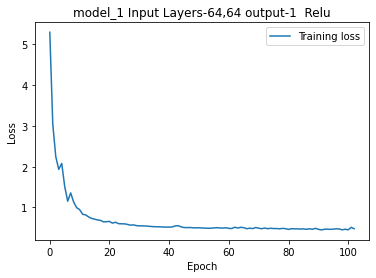

In [53]:
# train the model on the training data
history_1 = model_1.fit(X_train, y_train)

# evaluate the performance of the model on the validation set
accuracy_model1 = model_1.score(X_val, y_val)
print('Validation set accuracy: {:.2f}%'.format(accuracy_model1 * 100))
final_loss_model1 = model_1.loss_
print("Final loss value: ", final_loss_model1)

# Plot the training and validation loss over epochs
plt.title("model_1 Input Layers-64,64 output-1  Relu")
plt.plot(history_1.loss_curve_, label='Training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
model_1a = MLPClassifier(hidden_layer_sizes=(24,24,24),activation='relu', solver='adam', max_iter=1000, random_state=100)
# train the model on the training data
model_1a.fit(X_train, y_train)
# evaluate the performance of the model on the validation set
accuracy_model1a = model_1a.score(X_val, y_val)
print('Validation set accuracy: {:.2f}%'.format(accuracy * 100))
final_loss_model1a = model_1a.loss_
print("Final loss value: ", final_loss_model1a)

Validation set accuracy: 71.64%
Final loss value:  0.4965530885545119


In [40]:
model_1b = MLPClassifier(hidden_layer_sizes=(8,4,2),activation='relu', solver='adam', max_iter=50, random_state=100)
# train the model on the training data
model_1b.fit(X_train, y_train)
# evaluate the performance of the model on the validation set
accuracy_model1b = model_1a.score(X_val, y_val)
print('Validation set accuracy: {:.2f}%'.format(accuracy * 100))
final_loss_model1b = model_1b.loss_
print("Final loss value: ", final_loss_model1a)

Validation set accuracy: 71.64%
Final loss value:  0.4965530885545119


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [44]:
model_1c = MLPClassifier(hidden_layer_sizes=(16,8,4),activation='relu', solver='adam', max_iter=500, random_state=100)
# train the model on the training data
model_1c.fit(X_train, y_train)
# evaluate the performance of the model on the validation set
accuracy_model1c = model_1c.score(X_val, y_val)
print('Validation set accuracy: {:.2f}%'.format(accuracy * 100))
final_loss_model1c = model_1c.loss_
print("Final loss value: ", final_loss_model1c)

Validation set accuracy: 71.64%
Final loss value:  0.5972425933060064


#best model among all the models

In [28]:
model_1d = MLPClassifier(hidden_layer_sizes=(1024,128,16),activation='tanh', solver='adam', max_iter=500, random_state=100)
# train the model on the training data
model_1d.fit(X_train, y_train)
# evaluate the performance of the model on the validation set
accuracy_model1d = model_1d.score(X_val, y_val)
print('Validation set accuracy: {:.2f}%'.format(accuracy * 100))
final_loss_model1d = model_1d.loss_
print("Final loss value: ", final_loss_model1d)

Validation set accuracy: 71.64%
Final loss value:  0.3131040382696714


In [35]:
print("Model Summary:")
print("Number of Layers:", model_1d.n_layers_)
print("Number of Outputs:", model_1d.n_outputs_)
print("Number of Iterations:", model_1d.n_iter_)
print("Loss Function:", model_1d.loss_)
print("Activation Function:", model_1d.activation)
print("Final Training Score:", model_1d.score(X_train, y_train))
print("Final Validation Score:", model_1d.score(X_val, y_val))

Model Summary:
Number of Layers: 5
Number of Outputs: 1
Number of Iterations: 132
Loss Function: 0.3131040382696714
Activation Function: tanh
Final Training Score: 0.8565310492505354
Final Validation Score: 0.6965174129353234


Validation set accuracy: 69.65%
Final loss value:  0.3131040382696714


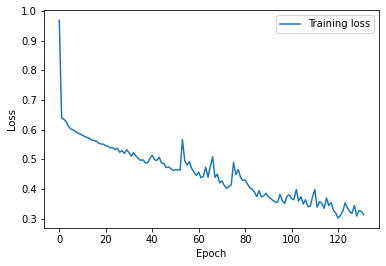

In [29]:
# train the model on the training data
history = model_1d.fit(X_train, y_train)

# evaluate the performance of the model on the validation set
accuracy_model1d = model_1d.score(X_val, y_val)
print('Validation set accuracy: {:.2f}%'.format(accuracy_model1d * 100))
final_loss_model1d = model_1d.loss_
print("Final loss value: ", final_loss_model1d)

# Plot the training and validation loss over epochs
plt.plot(history.loss_curve_, label='Training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [61]:
model_1d = MLPClassifier(hidden_layer_sizes=(1024,128,16),activation='tanh', solver='adam', max_iter=300, random_state=100)
# train the model on the training data
model_1d.fit(X_train, y_train)
# evaluate the performance of the model on the validation set
accuracy_model1d = model_1d.score(X_val, y_val)
print('Validation set accuracy: {:.2f}%'.format(accuracy * 100))
final_loss_model1d = model_1d.loss_
print("Final loss value: ", final_loss_model1d)

Validation set accuracy: 71.64%
Final loss value:  0.3131040382696714


In [45]:
model_1da = MLPClassifier(hidden_layer_sizes=(1024,128,16),activation='relu', solver='adam', max_iter=500, random_state=100)
# train the model on the training data
model_1da.fit(X_train, y_train)
# evaluate the performance of the model on the validation set
accuracy_model1da = model_1da.score(X_val, y_val)
print('Validation set accuracy: {:.2f}%'.format(accuracy * 100))
final_loss_model1da = model_1da.loss_
print("Final loss value: ", final_loss_model1da)

Validation set accuracy: 71.64%
Final loss value:  0.5886047825985796


Validation set accuracy: 69.65%
Final loss value:  0.5886047825985796


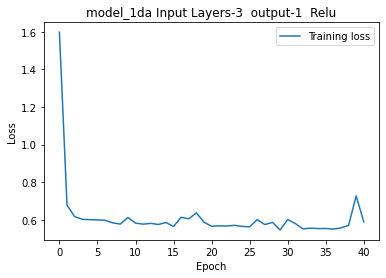

In [51]:
# train the model on the training data
history_1da = model_1da.fit(X_train, y_train)

# evaluate the performance of the model on the validation set
accuracy_model1da = model_1da.score(X_val, y_val)
print('Validation set accuracy: {:.2f}%'.format(accuracy_model1d * 100))
final_loss_model1da = model_1da.loss_
print("Final loss value: ", final_loss_model1da)

# Plot the training and validation loss over epochs
plt.title("model_1da Input Layers-3  output-1  Relu")
plt.plot(history_1da.loss_curve_, label='Training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Validation set accuracy: 69.65%
Final loss value:  0.3131040382696714


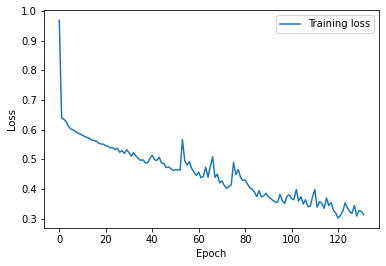

In [ ]:
model_1c = MLPClassifier(hidden_layer_sizes=(16,8,4),activation='relu', solver='adam', max_iter=60, random_state=100)
# train the model on the training data
model_1c.fit(X_train, y_train)
# evaluate the performance of the model on the validation set
accuracy_model1c = model_1c.score(X_val, y_val)
print('Validation set accuracy: {:.2f}%'.format(accuracy * 100))
final_loss_model1c = model_1c.loss_
print("Final loss value: ", final_loss_model1c)

Validation set accuracy: 69.65%
Final loss value:  0.5972425933060064


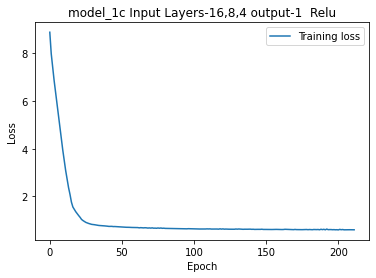

In [52]:
# train the model on the training data
history_1c = model_1c.fit(X_train, y_train)

# evaluate the performance of the model on the validation set
accuracy_model1c = model_1c.score(X_val, y_val)
print('Validation set accuracy: {:.2f}%'.format(accuracy_model1d * 100))
final_loss_model1c = model_1c.loss_
print("Final loss value: ", final_loss_model1c)

# Plot the training and validation loss over epochs
plt.title("model_1c Input Layers-16,8,4 output-1  Relu")
plt.plot(history_1c.loss_curve_, label='Training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#predictions on the test data by using bestmodel 
Model:Mlp Classifier




In [ ]:
# make predictions on test dataset
X_test = df_test.drop('id', axis=1)
y_pred = model_1d.predict(X_test)

# print the predicted class values
print(y_pred)

[1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0
 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0]


In [ ]:
df_test['prediction_Final']=y_pred

# Save the predictions to a .csv file
df_test.to_csv('test-predictions.csv', index=False)


In [ ]:
df_test

,id,A1,A2,A3,A4,A5,A6,A7,A8,prediction_Final
0,1,6,98,58,33,190,34.0,0.430,43,1
1,2,9,154,78,30,100,30.9,0.164,45,0
2,3,6,165,68,26,168,33.6,0.631,49,1
3,4,1,99,58,10,0,25.4,0.551,21,0
4,5,10,68,106,23,49,35.5,0.285,47,0
...,...,...,...,...,...,...,...,...,...,...
95,96,10,101,76,48,180,32.9,0.171,63,0
96,97,2,122,70,27,0,36.8,0.340,27,0
97,98,5,121,72,23,112,26.2,0.245,30,0
98,99,1,126,60,0,0,30.1,0.349,47,0


In [ ]:
import json
import pandas as pd

test_file_path = "/content/test-predictions.csv"
df_test2 = pd.read_csv(test_file_path)
df_test2 = df_test2[["id", "prediction_Final"]]


data = []
for index, row in df_test.iterrows():
    data.append({'id': int(row['id']), 'prediction': int(row['prediction_Final'])})

print(data[0:5])

submission_file_path = "submission.json"
with open(submission_file_path, 'w') as fp:
    fp.write('\n'.join(json.dumps(i) for i in data))

[{'id': 1, 'prediction': 1}, {'id': 2, 'prediction': 0}, {'id': 3, 'prediction': 1}, {'id': 4, 'prediction': 0}, {'id': 5, 'prediction': 0}]


In [ ]:
y_pred.shape

(100,)

In [46]:
model_1f = MLPClassifier(hidden_layer_sizes=(1024,1024),activation='tanh', solver='adam', max_iter=500, random_state=100)
# train the model on the training data
model_1f.fit(X_train, y_train)
# evaluate the performance of the model on the validation set
accuracy_model1f = model_1f.score(X_val, y_val)
print('Validation set accuracy: {:.2f}%'.format(accuracy * 100))
final_loss_model1f = model_1f.loss_
print("Final loss value: ", final_loss_model1f)

Validation set accuracy: 71.64%
Final loss value:  0.3249564479393439


Validation set accuracy: 69.65%
Final loss value:  0.3249564479393439


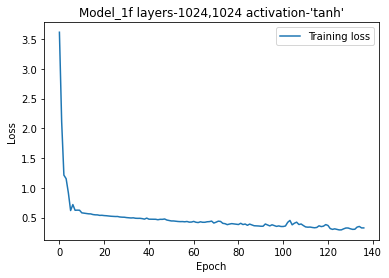

In [54]:
# train the model on the training data
history_1f = model_1f.fit(X_train, y_train)

# evaluate the performance of the model on the validation set
accuracy_model1f = model_1f.score(X_val, y_val)
print('Validation set accuracy: {:.2f}%'.format(accuracy_model1d * 100))
final_loss_model1f = model_1f.loss_
print("Final loss value: ", final_loss_model1f)

# Plot the training and validation loss over epochs
plt.title("Model_1f layers-1024,1024 activation-'tanh'")
plt.plot(history_1f.loss_curve_, label='Training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [47]:
model_1g = MLPClassifier(hidden_layer_sizes=(24,1),activation='tanh', solver='adam', max_iter=600, random_state=100)
# train the model on the training data
model_1g.fit(X_train, y_train)
# evaluate the performance of the model on the validation set
accuracy_model1g = model_1g.score(X_val, y_val)
print('Validation set accuracy: {:.2f}%'.format(accuracy * 100))
final_loss_model1g = model_1g.loss_
print("Final loss value: ", final_loss_model1g)

Validation set accuracy: 71.64%
Final loss value:  0.47326769156031534


In [20]:
model_1e = MLPClassifier(hidden_layer_sizes=(30,30,30),activation='relu', solver='adam', max_iter=500, random_state=42)
# train the model on the training data
model_1e.fit(X_train, y_train)
# evaluate the performance of the model on the validation set
accuracy_model1e = model_1e.score(X_val, y_val)
print('Validation set accuracy: {:.2f}%'.format(accuracy * 100))
final_loss_model1e = model_1e.loss_
print("Final loss value: ", final_loss_model1e)

Validation set accuracy: 71.64%
Final loss value:  0.433525676692501


In [22]:
model_1h = MLPClassifier(hidden_layer_sizes=(15,4,1),activation='relu', solver='adam', max_iter=500, random_state=100)
# train the model on the training data
model_1h.fit(X_train, y_train)
# evaluate the performance of the model on the validation set
accuracy_model1h = model_1h.score(X_val, y_val)
print('Validation set accuracy: {:.2f}%'.format(accuracy * 100))
final_loss_model1h = model_1h.loss_
print("Final loss value: ", final_loss_model1h)

Validation set accuracy: 71.64%
Final loss value:  0.6513103873550008


In [23]:
model_1i = MLPClassifier(hidden_layer_sizes=(1024,), activation='logistic', solver='adam', max_iter=500, random_state=100)
# train the model on the training data
model_1i.fit(X_train, y_train)
# evaluate the performance of the model on the validation set
accuracy_model1i = model_1i.score(X_val, y_val)
print('Validation set accuracy: {:.2f}%'.format(accuracy * 100))
final_loss_model1i = model_1i.loss_
print("Final loss value: ", final_loss_model1i)

Validation set accuracy: 71.64%
Final loss value:  0.4353979333093344


In [48]:
import pandas as pd

# create a dictionary to store the summary of each model
summary_dict ={'Model': [], 'Layers': [], 'Outputs': [], 'Iterations': [], 'Loss': [], 'Activation': [], 'Train Score': [], 'Validation Score': []}

# add summary of model_1 to the dictionary
summary_dict['Model'].append('model_1')
summary_dict['Layers'].append(len(model_1.hidden_layer_sizes))
summary_dict['Outputs'].append(model_1.n_outputs_)
summary_dict['Iterations'].append(model_1.n_iter_)
summary_dict['Loss'].append(model_1.loss_)
summary_dict['Activation'].append(model_1.activation)
summary_dict['Train Score'].append(model_1.score(X_train, y_train))
summary_dict['Validation Score'].append(model_1.score(X_val, y_val))
# add summary of model_1a to the dictionary
summary_dict['Model'].append('model_1a')
summary_dict['Layers'].append(len(model_1a.hidden_layer_sizes))
summary_dict['Outputs'].append(model_1a.n_outputs_)
summary_dict['Iterations'].append(model_1a.n_iter_)
summary_dict['Loss'].append(model_1a.loss_)
summary_dict['Activation'].append(model_1a.activation)
summary_dict['Train Score'].append(model_1a.score(X_train, y_train))
summary_dict['Validation Score'].append(model_1a.score(X_val, y_val))
# add summary of model_1b to the dictionary
summary_dict['Model'].append('model_1b')
summary_dict['Layers'].append(len(model_1b.hidden_layer_sizes))
summary_dict['Outputs'].append(model_1b.n_outputs_)
summary_dict['Iterations'].append(model_1b.n_iter_)
summary_dict['Loss'].append(model_1b.loss_)
summary_dict['Activation'].append(model_1a.activation)
summary_dict['Train Score'].append(model_1b.score(X_train, y_train))
summary_dict['Validation Score'].append(model_1b.score(X_val, y_val))
# add summary of model_1c to the dictionary
summary_dict['Model'].append('model_1c')
summary_dict['Layers'].append(len(model_1c.hidden_layer_sizes))
summary_dict['Outputs'].append(model_1c.n_outputs_)
summary_dict['Iterations'].append(model_1c.n_iter_)
summary_dict['Loss'].append(model_1c.loss_)
summary_dict['Activation'].append(model_1c.activation)
summary_dict['Train Score'].append(model_1c.score(X_train, y_train))
summary_dict['Validation Score'].append(model_1c.score(X_val, y_val))

# add summary of model_1d to the dictionary
summary_dict['Model'].append('model_1d')
summary_dict['Layers'].append(len(model_1d.hidden_layer_sizes))
summary_dict['Outputs'].append(model_1d.n_outputs_)
summary_dict['Iterations'].append(model_1d.n_iter_)
summary_dict['Loss'].append(model_1d.loss_)
summary_dict['Activation'].append(model_1d.activation)
summary_dict['Train Score'].append(model_1d.score(X_train, y_train))
summary_dict['Validation Score'].append(model_1d.score(X_val, y_val))

# add summary of model_1da to the dictionary
summary_dict['Model'].append('model_1da')
summary_dict['Layers'].append(len(model_1da.hidden_layer_sizes))
summary_dict['Outputs'].append(model_1da.n_outputs_)
summary_dict['Iterations'].append(model_1da.n_iter_)
summary_dict['Loss'].append(model_1da.loss_)
summary_dict['Activation'].append(model_1da.activation)
summary_dict['Train Score'].append(model_1da.score(X_train, y_train))
summary_dict['Validation Score'].append(model_1da.score(X_val, y_val))
# add summary of model_1h to the dictionary
summary_dict['Model'].append('model_1h')
summary_dict['Layers'].append(len(model_1h.hidden_layer_sizes))
summary_dict['Outputs'].append(model_1h.n_outputs_)
summary_dict['Iterations'].append(model_1h.n_iter_)
summary_dict['Loss'].append(model_1h.loss_)
summary_dict['Activation'].append(model_1h.activation)
summary_dict['Train Score'].append(model_1h.score(X_train, y_train))
summary_dict['Validation Score'].append(model_1h.score(X_val, y_val))
# add summary of model_1e to the dictionary
summary_dict['Model'].append('model_1e')
summary_dict['Layers'].append(len(model_1e.hidden_layer_sizes))
summary_dict['Outputs'].append(model_1e.n_outputs_)
summary_dict['Iterations'].append(model_1e.n_iter_)
summary_dict['Loss'].append(model_1e.loss_)
summary_dict['Activation'].append(model_1e.activation)
summary_dict['Train Score'].append(model_1e.score(X_train, y_train))
summary_dict['Validation Score'].append(model_1e.score(X_val, y_val))
# add summary of model_1f to the dictionary
summary_dict['Model'].append('model_1f')
summary_dict['Layers'].append(len(model_1f.hidden_layer_sizes))
summary_dict['Outputs'].append(model_1f.n_outputs_)
summary_dict['Iterations'].append(model_1f.n_iter_)
summary_dict['Loss'].append(model_1f.loss_)
summary_dict['Activation'].append(model_1f.activation)
summary_dict['Train Score'].append(model_1f.score(X_train, y_train))
summary_dict['Validation Score'].append(model_1f.score(X_val, y_val))
# add summary of model_1g to the dictionary
summary_dict['Model'].append('model_1g')
summary_dict['Layers'].append(len(model_1g.hidden_layer_sizes))
summary_dict['Outputs'].append(model_1g.n_outputs_)
summary_dict['Iterations'].append(model_1g.n_iter_)
summary_dict['Loss'].append(model_1g.loss_)
summary_dict['Activation'].append(model_1g.activation)
summary_dict['Train Score'].append(model_1g.score(X_train, y_train))
summary_dict['Validation Score'].append(model_1g.score(X_val, y_val))

# create a DataFrame from the dictionary
summary_df = pd.DataFrame(summary_dict)

# print the DataFrame
print(summary_df)


       Model  Layers  Outputs  Iterations      Loss Activation  Train Score  \
0    model_1       2        1         103  0.478709       relu     0.762313   
1   model_1a       3        1         208  0.496553       relu     0.745182   
2   model_1b       3        1          50  0.673121       relu     0.653105   
3   model_1c       3        1         212  0.597243       relu     0.702355   
4   model_1d       3        1         132  0.313104       tanh     0.856531   
5  model_1da       3        1          41  0.588605       relu     0.702355   
6   model_1h       3        1         362  0.651310       relu     0.657388   
7   model_1e       3        1         237  0.433526       relu     0.792291   
8   model_1f       2        1         137  0.324956       tanh     0.847966   
9   model_1g       2        1         578  0.473268       tanh     0.788009   

   Validation Score  
0          0.706468  
1          0.726368  
2          0.656716  
3          0.676617  
4          0.696517 

#feed forward neural netowork


In [49]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to test
hyperparameters = {
    'hidden_layer_sizes': [(8,), (16,), (32,), (64,), (128,), (256,), (512,), (1024,), (2048,)],
    'activation': ['relu', 'tanh', 'logistic'], # try sigmoid
    'solver': ['sgd', 'adam'],
    'max_iter': [100, 500, 1000],
}

# Create the model
model_1e = MLPClassifier(random_state=100)

# Use GridSearchCV to find the best hyperparameters
grid = GridSearchCV(model_1e, hyperparameters, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# Print the best hyperparameters and the accuracy on the test set
print('Best hyperparameters:', grid.best_params_)
print('Test set accuracy:', grid.score(X_val,y_val))


Best hyperparameters: {'activation': 'logistic', 'hidden_layer_sizes': (1024,), 'max_iter': 500, 'solver': 'adam'}
Test set accuracy: 0.7711442786069652


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from scipy.stats import randint

# Define the hyperparameter space
param_dist = {
    'hidden_layer_sizes': [(16,), (32,), (64,), (128,), (256,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [100, 200, 500,1000]
}

# Create the MLPClassifier model
mlp = MLPClassifier()

# Randomized search
random_search = RandomizedSearchCV(
    mlp, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1
)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print(random_search.best_params_)


{'solver': 'adam', 'max_iter': 500, 'hidden_layer_sizes': (128,), 'alpha': 0.001, 'activation': 'relu'}


In [ ]:
model_1f = MLPClassifier(hidden_layer_sizes=(15,7,7,1),activation='relu', solver='adam', max_iter=1000, random_state=100)


In [ ]:
# train the model on the training data
model_1f.fit(X_train, y_train)
# evaluate the performance of the model on the validation set
accuracy_model1d = model_1f.score(X_val, y_val)
print('Validation set accuracy: {:.2f}%'.format(accuracy * 100))
final_loss_model1f = model_1f.loss_
print("Final loss value: ", final_loss_model1f)

Validation set accuracy: 71.64%
Final loss value:  0.653687325355747


#model_2 with the keras

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
# Define the neural network architecture
model_2 = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

# Compile the model
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

# Evaluate the model on the validation set
results = model_2.evaluate(X_val, y_val, batch_size=128)
print("Validation accuracy: ", results[1])
print("Validation loss: ", results[0])

Epoch 1/100
15/15 [==============================] - 1s 26ms/step - loss: 3.6656 - accuracy: 0.5867 - val_loss: 1.0780 - val_accuracy: 0.6418
Epoch 2/100
15/15 [==============================] - 0s 9ms/step - loss: 1.2571 - accuracy: 0.5717 - val_loss: 0.7069 - val_accuracy: 0.6020
Epoch 3/100
15/15 [==============================] - 0s 8ms/step - loss: 0.8873 - accuracy: 0.6103 - val_loss: 0.6140 - val_accuracy: 0.6965
Epoch 4/100
15/15 [==============================] - 0s 9ms/step - loss: 0.6421 - accuracy: 0.6724 - val_loss: 0.6043 - val_accuracy: 0.7065
Epoch 5/100
15/15 [==============================] - 0s 9ms/step - loss: 0.6165 - accuracy: 0.6595 - val_loss: 0.6222 - val_accuracy: 0.6965
Epoch 6/100
15/15 [==============================] - 0s 8ms/step - loss: 0.7014 - accuracy: 0.6424 - val_loss: 0.9942 - val_accuracy: 0.6368
Epoch 7/100
15/15 [==============================] - 0s 8ms/step - loss: 0.8377 - accuracy: 0.6467 - val_loss: 0.8429 - val_accuracy: 0.6716
Epoch 8/100


In [25]:
from tensorflow import keras
from tensorflow.keras import layers
# Define the neural network architecture
model_2 = keras.Sequential([
    layers.Dense(15, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(7, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

# Compile the model
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

# Evaluate the model on the validation set
results = model_2.evaluate(X_val, y_val, batch_size=128)
print("Validation accuracy: ", results[1])
print("Validation loss: ", results[0])

Epoch 1/100
15/15 [==============================] - 2s 38ms/step - loss: 9.1531 - accuracy: 0.5824 - val_loss: 7.2043 - val_accuracy: 0.5224
Epoch 2/100
15/15 [==============================] - 0s 13ms/step - loss: 5.2882 - accuracy: 0.4946 - val_loss: 4.4630 - val_accuracy: 0.4975
Epoch 3/100
15/15 [==============================] - 0s 15ms/step - loss: 3.2426 - accuracy: 0.5353 - val_loss: 3.2008 - val_accuracy: 0.4279
Epoch 4/100
15/15 [==============================] - 0s 12ms/step - loss: 2.6059 - accuracy: 0.5096 - val_loss: 2.7534 - val_accuracy: 0.4776
Epoch 5/100
15/15 [==============================] - 0s 10ms/step - loss: 2.2933 - accuracy: 0.5589 - val_loss: 2.2987 - val_accuracy: 0.5373
Epoch 6/100
15/15 [==============================] - 0s 11ms/step - loss: 1.9013 - accuracy: 0.5846 - val_loss: 1.9354 - val_accuracy: 0.5224
Epoch 7/100
15/15 [==============================] - 0s 9ms/step - loss: 1.7091 - accuracy: 0.5846 - val_loss: 1.7063 - val_accuracy: 0.5672
Epoch 8

In [36]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                135       
                                                                 
 dense_1 (Dense)             (None, 7)                 112       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 255
Trainable params: 255
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
15/15 [==============================] - 1s 17ms/step - loss: 1.9005 - accuracy: 0.5696 - val_loss: 0.9828 - val_accuracy: 0.6169
Epoch 2/100
15/15 [==============================] - 0s 7ms/step - loss: 0.9285 - accuracy: 0.6188 - val_loss: 0.8358 - val_accuracy: 0.6418
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.7891 - accuracy: 0.6210 - val_loss: 0.7611 - val_accuracy: 0.6567
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.7620 - accuracy: 0.6467 - val_loss: 0.6909 - val_accuracy: 0.6368
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6781 - accuracy: 0.6531 - val_loss: 0.6862 - val_accuracy: 0.6517
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6281 - accuracy: 0.6788 - val_loss: 0.6781 - val_accuracy: 0.6567
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6075 - accuracy: 0.6895 - val_loss: 0.6573 - val_accuracy: 0.6468
Epoch 8/100


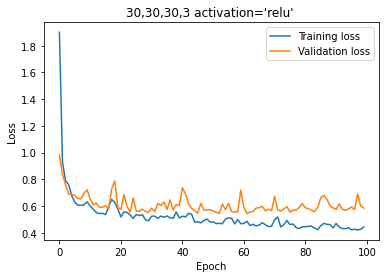

In [26]:


# Define the model
model_2a = keras.Sequential([
    layers.Dense(30, activation='relu', input_shape=[8]),
    layers.Dense(30, activation='relu'),
    layers.Dense(30, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2a.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_2a = model_2a.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

# Evaluate the model
test_loss, test_accuracy = model_2a.evaluate(X_val, y_val)
print('Test accuracy:', test_accuracy)

# Plot the training and validation loss over epochs
plt.title("30,30,30,3 activation='relu' ")
plt.plot(history_2a.history['loss'], label='Training loss')
plt.plot(history_2a.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
# Define the neural network architecture
model_2_c = keras.Sequential([
    layers.Dense(1024, activation='tanh', input_shape=[X_train.shape[1]]),
    layers.Dense(128, activation='tanh'),
    layers.Dense(16, activation='tanh'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2_c.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_2_c.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500)

# Evaluate the model on the validation set
results_c = model_2_c.evaluate(X_val, y_val, batch_size=128)
print("Validation accuracy: ", results_c[1])
print("Validation loss: ", results_c[0])

Epoch 1/500
15/15 [==============================] - 1s 21ms/step - loss: 0.7140 - accuracy: 0.6039 - val_loss: 0.6154 - val_accuracy: 0.6567
Epoch 2/500
15/15 [==============================] - 0s 8ms/step - loss: 0.6100 - accuracy: 0.6552 - val_loss: 0.5896 - val_accuracy: 0.6716
Epoch 3/500
15/15 [==============================] - 0s 10ms/step - loss: 0.6086 - accuracy: 0.6767 - val_loss: 0.5811 - val_accuracy: 0.6766
Epoch 4/500
15/15 [==============================] - 0s 9ms/step - loss: 0.5963 - accuracy: 0.6660 - val_loss: 0.5876 - val_accuracy: 0.6766
Epoch 5/500
15/15 [==============================] - 0s 9ms/step - loss: 0.5818 - accuracy: 0.7024 - val_loss: 0.5824 - val_accuracy: 0.6816
Epoch 6/500
15/15 [==============================] - 0s 9ms/step - loss: 0.6123 - accuracy: 0.6424 - val_loss: 0.6037 - val_accuracy: 0.6468
Epoch 7/500
15/15 [==============================] - 0s 8ms/step - loss: 0.5854 - accuracy: 0.6959 - val_loss: 0.6023 - val_accuracy: 0.6716
Epoch 8/500

Epoch 1/500
15/15 [==============================] - 1s 23ms/step - loss: 1.4415 - accuracy: 0.6039 - val_loss: 0.6503 - val_accuracy: 0.6368
Epoch 2/500
15/15 [==============================] - 0s 9ms/step - loss: 0.6285 - accuracy: 0.6574 - val_loss: 0.6041 - val_accuracy: 0.6766
Epoch 3/500
15/15 [==============================] - 0s 9ms/step - loss: 0.6103 - accuracy: 0.6745 - val_loss: 0.6778 - val_accuracy: 0.6716
Epoch 4/500
15/15 [==============================] - 0s 9ms/step - loss: 0.6423 - accuracy: 0.6403 - val_loss: 0.6013 - val_accuracy: 0.6716
Epoch 5/500
15/15 [==============================] - 0s 10ms/step - loss: 0.7294 - accuracy: 0.6146 - val_loss: 0.6471 - val_accuracy: 0.5771
Epoch 6/500
15/15 [==============================] - 0s 13ms/step - loss: 0.6863 - accuracy: 0.6424 - val_loss: 0.5958 - val_accuracy: 0.7164
Epoch 7/500
15/15 [==============================] - 0s 17ms/step - loss: 0.6865 - accuracy: 0.6531 - val_loss: 0.6383 - val_accuracy: 0.6667
Epoch 8/5

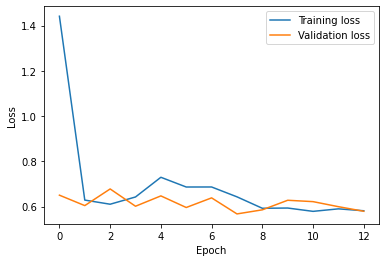

In [58]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the neural network architecture
model_2_ca = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(128, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2_ca.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

# Train the model
history_ca = model_2_ca.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, callbacks=[early_stopping])

# Evaluate the model on the validation set
results_ca = model_2_ca.evaluate(X_val, y_val, batch_size=128)
print("Validation accuracy: ", results_ca[1])
print("Validation loss: ", results_ca[0])

# Plot the training and validation loss over epochs
plt.plot(history_ca.history['loss'], label='Training loss')
plt.plot(history_ca.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [59]:
model_2_ca.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1024)              9216      
                                                                 
 dense_10 (Dense)            (None, 128)               131200    
                                                                 
 dense_11 (Dense)            (None, 16)                2064      
                                                                 
 dense_12 (Dense)            (None, 1)                 17        
                                                                 
Total params: 142,497
Trainable params: 142,497
Non-trainable params: 0
_________________________________________________________________


Epoch 1/500
15/15 [==============================] - 0s 13ms/step - loss: 0.1160 - accuracy: 0.9572 - val_loss: 1.1116 - val_accuracy: 0.7264
Epoch 2/500
15/15 [==============================] - 0s 9ms/step - loss: 0.1600 - accuracy: 0.9379 - val_loss: 1.2060 - val_accuracy: 0.6766
Epoch 3/500
15/15 [==============================] - 0s 9ms/step - loss: 0.1206 - accuracy: 0.9507 - val_loss: 1.2446 - val_accuracy: 0.6965
Epoch 4/500
15/15 [==============================] - 0s 8ms/step - loss: 0.1626 - accuracy: 0.9293 - val_loss: 1.1345 - val_accuracy: 0.7214
Epoch 5/500
15/15 [==============================] - 0s 8ms/step - loss: 0.1616 - accuracy: 0.9379 - val_loss: 1.0165 - val_accuracy: 0.7065
Epoch 6/500
15/15 [==============================] - 0s 9ms/step - loss: 0.1376 - accuracy: 0.9529 - val_loss: 1.0943 - val_accuracy: 0.7214
Epoch 7/500
15/15 [==============================] - 0s 9ms/step - loss: 0.0990 - accuracy: 0.9636 - val_loss: 1.1959 - val_accuracy: 0.7065
Epoch 8/500


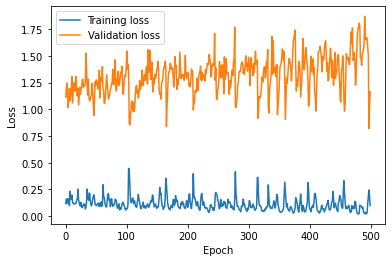

In [ ]:
import matplotlib.pyplot as plt

# Train the model
history = model_2_c.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val))

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/500
15/15 [==============================] - 1s 17ms/step - loss: 5.3508 - accuracy: 0.6531 - val_loss: 5.2951 - val_accuracy: 0.6567
Epoch 2/500
15/15 [==============================] - 0s 5ms/step - loss: 5.3508 - accuracy: 0.6531 - val_loss: 5.2951 - val_accuracy: 0.6567
Epoch 3/500
15/15 [==============================] - 0s 5ms/step - loss: 5.3508 - accuracy: 0.6531 - val_loss: 5.2951 - val_accuracy: 0.6567
Epoch 4/500
15/15 [==============================] - 0s 6ms/step - loss: 5.3508 - accuracy: 0.6531 - val_loss: 5.2951 - val_accuracy: 0.6567
Epoch 5/500
15/15 [==============================] - 0s 6ms/step - loss: 5.3508 - accuracy: 0.6531 - val_loss: 5.2951 - val_accuracy: 0.6567
Epoch 6/500
15/15 [==============================] - 0s 5ms/step - loss: 5.3508 - accuracy: 0.6531 - val_loss: 5.2951 - val_accuracy: 0.6567
Epoch 6: early stopping
2/2 [==============================] - 0s 8ms/step - loss: 5.2951 - accuracy: 0.6567
Validation accuracy:  0.6567164063453674
Val

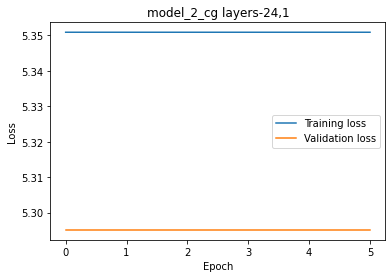

In [55]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the neural network architecture
model_2_cg = keras.Sequential([
    layers.Dense(24, activation='tanh', input_shape=[X_train.shape[1]]),
    layers.Dense(1, activation='tanh'),
    
])

# Compile the model
model_2_cg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

# Train the model
history_cg = model_2_cg.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, callbacks=[early_stopping])

# Evaluate the model on the validation set
results_cg = model_2_cg.evaluate(X_val, y_val, batch_size=128)
print("Validation accuracy: ", results_cg[1])
print("Validation loss: ", results_cg[0])

# Plot the training and validation loss over epochs
plt.title("model_2_cg layers-24,1")
plt.plot(history_cg.history['loss'], label='Training loss')
plt.plot(history_cg.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [56]:
model_2_cg.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 24)                216       
                                                                 
 dense_8 (Dense)             (None, 1)                 25        
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


#model_3 Recurrent Neural Network

Epoch 1/500
15/15 [==============================] - 2s 28ms/step - loss: 0.6590 - accuracy: 0.6188 - val_loss: 0.5993 - val_accuracy: 0.6567
Epoch 2/500
15/15 [==============================] - 0s 9ms/step - loss: 0.5769 - accuracy: 0.6702 - val_loss: 0.5592 - val_accuracy: 0.7164
Epoch 3/500
15/15 [==============================] - 0s 8ms/step - loss: 0.4868 - accuracy: 0.7794 - val_loss: 0.5635 - val_accuracy: 0.7164
Epoch 4/500
15/15 [==============================] - 0s 8ms/step - loss: 0.3782 - accuracy: 0.8308 - val_loss: 0.6779 - val_accuracy: 0.6965
Epoch 5/500
15/15 [==============================] - 0s 8ms/step - loss: 0.3107 - accuracy: 0.8501 - val_loss: 0.7070 - val_accuracy: 0.7313
Epoch 6/500
15/15 [==============================] - 0s 8ms/step - loss: 0.2555 - accuracy: 0.8844 - val_loss: 0.8220 - val_accuracy: 0.7264
Epoch 7/500
15/15 [==============================] - 0s 11ms/step - loss: 0.2031 - accuracy: 0.9208 - val_loss: 0.9460 - val_accuracy: 0.7065
Epoch 7: ea

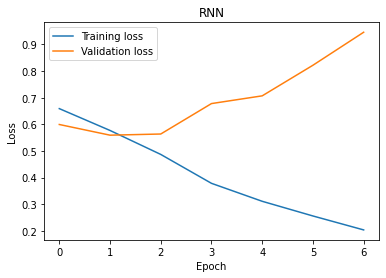

In [64]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the neural network architecture
model_3 = keras.Sequential([
    layers.Embedding(input_dim=1000, output_dim=64),
    layers.SimpleRNN(units=64),
    layers.Dense(units=1, activation="sigmoid")
])

# Compile the model
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

# Train the model
history_3 = model_3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, callbacks=[early_stopping])

# Evaluate the model on the validation set
results_3 = model_3.evaluate(X_val, y_val, batch_size=128)
print("Validation accuracy: ", results_3[1])
print("Validation loss: ", results_3[0])

# Plot the training and validation loss over epochs
plt.title("RNN")
plt.plot(history_3.history['loss'], label='Training loss')
plt.plot(history_3.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [65]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          64000     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 72,321
Trainable params: 72,321
Non-trainable params: 0
_________________________________________________________________


In [63]:
import pandas as pd
from tensorflow.keras import layers, models

# Define the list of models
models_list = [
    keras.Sequential([
    layers.Dense(24, activation='tanh', input_shape=[X_train.shape[1]]),
    layers.Dense(1, activation='tanh'),
    
    
    ]),
    models.Sequential([
        layers.Embedding(input_dim=1000, output_dim=64),
        layers.SimpleRNN(units=64),
        layers.Dense(units=1, activation="sigmoid")
    ])
]

# Create a list to store the summaries of each model
summaries = []

# Loop through each model and add its summary to the list
for model in models_list:
    summary = model.summary()
    summaries.append(summary)

# Create a dataframe from the summaries list
df_FNN_Summary = pd.DataFrame(summaries, columns=['Model Summary'])
print(df_FNN_Summary)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 24)                216       
                                                                 
 dense_14 (Dense)            (None, 1)                 25        
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          64000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None

In [ ]:
X_train.shape

(467, 8)

In [ ]:
X_val.shape

(201, 8)